# EDA for API and ML recommendation model

Importing the libraries I will need

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from ydata_profiling import ProfileReport
from wordcloud import WordCloud

import seaborn as sns
sns.set()

Reading the csv file with the cleaned data

In [21]:
df=pd.read_csv('Datasets\Movies_ETL.csv')

Now, in the ETL I only did the transformations that were requested. However, in this EDA I will still modify the dataset to adjust it exactly how I want it. That also means I am only keeping the columns I need for the API's functions and the recommendation model. 

Now, let us start.

Dropping duplicates and Visualizing the DataFrame. Since I dropped some rows, I am reseting the index to avoid any kind of malfunction.

In [22]:
df.drop_duplicates(inplace=True)
df.drop_duplicates(subset=['id'],inplace=True)
df=df.reset_index(drop=True)

In [23]:
df.head()

budget     id original_language  \
0  30000000.0    862                en   
1  65000000.0   8844                en   
2         0.0  15602                en   
3  16000000.0  31357                en   
4         0.0  11862                en   

                                            overview  popularity release_date  \
0  Led by Woody, Andy's toys live happily in his ...   21.946943   1995-10-30   
1  When siblings Judy and Peter discover an encha...   17.015539   1995-12-15   
2  A family wedding reignites the ancient feud be...   11.712900   1995-12-22   
3  Cheated on, mistreated and stepped on, the wom...    3.859495   1995-12-22   
4  Just when George Banks has recovered from his ...    8.387519   1995-02-10   

       revenue  runtime    status  \
0  373554033.0     81.0  Released   
1  262797249.0    104.0  Released   
2          0.0    101.0  Released   
3   81452156.0    127.0  Released   
4   76578911.0    106.0  Released   

                                             tagline  ...  \
0                                                NaN  ...   
1          Roll the dice and unleash the excitement!  ...   
2  Still Yelling. Still Fighting. Still Ready for...  ...   
3  Friends are the people who let you be yourself...  ...   
4  Just When His World Is Back To Normal... He's ...  ...   

                  collection_name  idcollection  \
0            Toy Story Collection       10194.0   
1                             NaN           NaN   
2       Grumpy Old Men Collection      119050.0   
3                             NaN           NaN   
4  Father of the Bride Collection       96871.0   

                          genres_name         idgenres  \
0   ['Animation', 'Comedy', 'Family']  [16, 35, 10751]   
1  ['Adventure', 'Fantasy', 'Family']  [12, 14, 10751]   
2               ['Romance', 'Comedy']      [10749, 35]   
3      ['Comedy', 'Drama', 'Romance']  [35, 18, 10749]   
4                          ['Comedy']             [35]   

                slang_name  slang_isocode  \
0              ['English']         ['en']   
1  ['English', 'Français']   ['en', 'fr']   
2              ['English']         ['en']   
3              ['English']         ['en']   
4              ['English']         ['en']   

                                       pcompany_name          idpcompany  \
0                        ['Pixar Animation Studios']                 [3]   
1  ['TriStar Pictures', 'Teitler Film', 'Intersco...  [559, 2550, 10201]   
2                 ['Warner Bros.', 'Lancaster Gate']       [6194, 19464]   
3         ['Twentieth Century Fox Film Corporation']               [306]   
4   ['Sandollar Productions', 'Touchstone Pictures']        [5842, 9195]   

                  pcountry_name pcountry_isocode  
0  ['United States of America']           ['US']  
1  ['United States of America']           ['US']  
2  ['United States of America']           ['US']  
3  ['United States of America']           ['US']  
4  ['United States of America']           ['US']  

[5 rows x 24 columns]

Getting information on the columns

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45346 entries, 0 to 45345
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   budget             45346 non-null  float64
 1   id                 45346 non-null  int64  
 2   original_language  45335 non-null  object 
 3   overview           44405 non-null  object 
 4   popularity         45346 non-null  float64
 5   release_date       45346 non-null  object 
 6   revenue            45346 non-null  float64
 7   runtime            45100 non-null  float64
 8   status             45266 non-null  object 
 9   tagline            20387 non-null  object 
 10  title              45346 non-null  object 
 11  vote_average       45346 non-null  float64
 12  release_year       45346 non-null  int64  
 13  return             45346 non-null  float64
 14  collection_name    4485 non-null   object 
 15  idcollection       4485 non-null   float64
 16  genres_name        453

Counting null values

In [25]:
df.isna().sum().sort_values(ascending = False)

idcollection         40861
collection_name      40861
tagline              24959
overview               941
runtime                246
status                  80
original_language       11
budget                   0
pcountry_name            0
idpcompany               0
pcompany_name            0
slang_isocode            0
slang_name               0
idgenres                 0
genres_name              0
release_year             0
return                   0
id                       0
vote_average             0
title                    0
revenue                  0
release_date             0
popularity               0
pcountry_isocode         0
dtype: int64

From this, I can see that the columns idcollection and collection_name have the highest count of NaN values. These two columns are related, it makes sense that they both have so many missing values if we keep in mind they indicate to which collection or franchise a specific film belongs to. Not every movie belongs to a franchise, in fact, most of the movies in this dataset do not. 

The tagline column also has a high count of missing values, I think this might be because not every movie has a famous or memorable line that people necessarily remember. Maybe they just did not have the information when creating the dataset. Anyway, I am going to drop this column, I do not think it is relevant for the model and I can not really use it for anything else in the EDA.

In [26]:
df.drop(columns=['tagline'], inplace=True)

Reviewing the missing values in the overview column

In [27]:
df[df.overview.isna()]

budget      id original_language overview  popularity release_date  \
32            0.0   78802                fr      NaN    0.745542   1996-09-18   
300    22000000.0  161495                sv      NaN    3.395867   1995-03-01   
634           0.0  287305                de      NaN    0.066123   1996-03-21   
635           0.0  339428                de      NaN    0.002229   1996-03-14   
641           0.0   10801                de      NaN    0.821299   1996-03-06   
...           ...     ...               ...      ...         ...          ...   
45223         0.0  395767                fr      NaN    1.238471   2017-01-11   
45224         0.0  199887                en      NaN    0.704642   2013-01-04   
45259         0.0  317389                es      NaN    0.006352   1973-07-22   
45280   1254040.0  468707                fi      NaN    0.347806   2017-07-28   
45281    750000.0  280422                ru      NaN    0.201582   2014-06-05   

          revenue  runtime    status                             title  ...  \
32            0.0     50.0  Released                  Wings of Courage  ...   
300    12400000.0    108.0  Released                         Roommates  ...   
634           0.0      NaN  Released    Peanuts – Die Bank zahlt alles  ...   
635       65335.0      NaN  Released                     Happy Weekend  ...   
641           0.0     86.0  Released                     The Superwife  ...   
...           ...      ...       ...                               ...  ...   
45223         0.0     88.0  Released                            Scribe  ...   
45224         0.0     87.0  Released                        Over/Under  ...   
45259         0.0      NaN  Released     Simbad e il califfo di Bagdad  ...   
45280         0.0     90.0  Released  Thick Lashes of Lauri Mäntyvaara  ...   
45281         3.0      0.0  Released                       All at Once  ...   

       collection_name  idcollection               genres_name     idgenres  \
32                 NaN           NaN  ['Romance', 'Adventure']  [10749, 12]   
300                NaN           NaN       ['Drama', 'Comedy']     [18, 35]   
634                NaN           NaN                ['Comedy']         [35]   
635                NaN           NaN                ['Comedy']         [35]   
641                NaN           NaN                ['Comedy']         [35]   
...                ...           ...                       ...          ...   
45223              NaN           NaN              ['Thriller']         [53]   
45224              NaN           NaN                 ['Drama']         [18]   
45259              NaN           NaN             ['Adventure']         [12]   
45280              NaN           NaN     ['Romance', 'Comedy']  [10749, 35]   
45281              NaN           NaN       ['Crime', 'Comedy']     [80, 35]   

         slang_name slang_isocode  \
32      ['English']        ['en']   
300     ['English']        ['en']   
634              []            []   
635     ['Deutsch']        ['de']   
641     ['Deutsch']        ['de']   
...             ...           ...   
45223  ['Français']        ['fr']   
45224   ['English']        ['en']   
45259  ['Italiano']        ['it']   
45280     ['suomi']        ['fi']   
45281   ['Pусский']        ['ru']   

                                           pcompany_name           idpcompany  \
32                              ['Iwerks Entertainment']              [70801]   
300    ['Hollywood Pictures', 'Interscope Communicati...  [915, 10201, 12883]   
634                     ['Westdeutscher Rundfunk (WDR)']               [7025]   
635                          ['Senator Film Produktion']                [191]   
641                                  ['Constantin Film']                 [47]   
...                                                  ...                  ...   
45223                                ['2425 PRODUCTION']              [76298]   
45224  ['Fox Television Studios', 'Universal Ca

I realized that on the rows where the missing values of this column are located, there is not so much additional information that might be relevant to the recommendation system and the majority of them are not really that popular. Also, a lot of them are not produced in the US so that might be why there is so much information missing.

I want to see if any of those movies belong to a franchise, so I am going to see how many of these rows do not have missing values in the collection_name column. 

In [28]:
df[df['overview'].isna()]['collection_name'].notna().sum()

59

Now, I am going to explore these values further.

In [29]:
df[df['overview'].isna() & df['collection_name'].notna()]

budget      id original_language overview  popularity release_date  \
5945          0.0   29224                sv      NaN    1.040732   1982-09-17   
14118         0.0   18120                es      NaN    2.824590   2009-01-01   
17254         0.0   55763                fi      NaN    0.072357   1994-09-16   
17257         0.0   55761                fi      NaN    0.000001   1992-10-09   
17300         0.0   55754                fi      NaN    0.107327   1991-10-18   
17308         0.0  148314                fi      NaN    0.071764   1997-09-26   
17330         0.0   55756                fi      NaN    0.001021   1990-11-02   
17331         0.0   55759                fi      NaN    0.072329   1997-08-15   
22736  13640000.0  246320                fr      NaN    5.084853   2014-02-12   
24581         0.0   12076                no      NaN    0.466995   2005-09-23   
25463         0.0   52238                it      NaN    0.462348   1979-10-10   
25467         0.0   62725                it      NaN    0.027777   1980-01-01   
25635         0.0   48805                it      NaN    1.773828   2008-01-11   
25859         0.0   59040                it      NaN    0.169231   1984-01-01   
26549         0.0   58757                de      NaN    0.732480   1952-11-13   
27646         0.0   30149                sv      NaN    0.943978   1993-12-25   
29399         0.0  290043                de      NaN    0.003565   2006-11-03   
30140   5579750.0  161545                it      NaN    2.208906   2012-11-30   
30421         0.0   80374                it      NaN    0.386718   1951-01-01   
30425         0.0   56920                it      NaN    0.221073   1963-01-01   
30718         0.0   58188                it      NaN    0.840422   1968-10-23   
30773         0.0   60038                it      NaN    0.283690   1983-01-01   
32011         0.0   41669                it      NaN    2.354176   1999-12-23   
32014         0.0   41665                it      NaN    3.269031   1993-01-01   
32018         0.0   38315                it      NaN    1.211666   1987-09-22   
33338         0.0  338312                hu      NaN    0.499400   2015-04-30   
33440         0.0   60193                it      NaN    0.142545   1959-01-01   
34480         0.0   45990                it      NaN    1.006004   2004-01-30   
34535         0.0   62034                it      NaN    0.149058   1955-03-03   
34627         0.0   84774                ru      NaN    0.320034   1981-01-31   
35245         0.0   55254                fi      NaN    0.107109   1998-08-28   
35247         0.0   55776                fi      NaN    0.085015   1987-08-28   
35248         0.0   62898                fi      NaN    0.120042   1986-08-29   
35249         0.0   62896                fi      NaN    0.407039   1983-09-30   
35250         0.0   62897                fi      NaN    0.009113   1982-09-17   
35261         0.0   58074                it      NaN    0.986756   1956-12-21   
35263         0.0   56068                it      NaN    1.916468   1956-04-12   
35749         0.0  135307                fr      NaN    0.877244   1992-12-23   
36472         0.0   74919                pl      NaN    0.547948   2005-04-09   
37075         0.0    2764                nl      NaN    0.508677   1997-05-01   
37223         0.0   19812                da      NaN    0.447242   2005-01-10   
37409         0.0  367596                de      NaN    0.291696   2015-06-25   
38581         0.0   58007                it      NaN    1.573912   1954-01-01   
39267         0.0  259634                it      NaN    0.029635   1988-12-30   
39268         0.0   46572                de      NaN    0.062275   1988-11-25   
39569         0.0  183073                it      NaN    0.251895   1962-10-11   
40072         0.0   38289                it      NaN    0.002538   1982-01-01   
41445         0.0  297298                tr      NaN    0.765972   2014-04-04   
41446         0.0  371153                t

Now I know these 59 films that are part of franchises, have very limited information, some of them do not even have genres. Because of this, I decided to keep the overview column but drop NaN values in it. I feel like even if I were to keep these records, those films would not show up as a recomendation because there is way too little information on them to actually find any significant similarities. 

In [30]:
df.dropna(subset=['overview'], inplace=True)

I am also resetting the index to avoid any issues later.

In [31]:
df=df.reset_index(drop=True)

I want to review next the status column, specifically I want to see the different values in it. I'll explain later why.

In [32]:
df.status.unique()

array(['Released', nan, 'Rumored', 'Post Production', 'In Production',
       'Planned', 'Canceled'], dtype=object)

Let's visualize the different values on the release year column so that I can match those with the status column, since some movies in that column appear to be 'cancelled', 'nan' or other status that suggest they are not available. So, my logic is that if it has a release year, then the status column is outdated if it says anything else that is not 'released'and the release year has already passed. Perhaps, the database is the outdated one but, for the purpose of this project, I am assuming the database is up to date. I am also sorting the values so that they are easier to interpret.

In [33]:
np.sort(df.release_year.unique())

array([1874, 1878, 1883, 1887, 1888, 1890, 1891, 1892, 1893, 1894, 1895,
       1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906,
       1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917,
       1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928,
       1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939,
       1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950,
       1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961,
       1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972,
       1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
       1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994,
       1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2020], dtype=int64)

From this, I conclude that the status column is outdated since the release year column has no null values, all the values in it are valid years and this indicates that all of the movies currently in my dataset were released no later than 2020. For this reason I will not be using the status column in my model and I am going to drop it. 

In [34]:
df.drop(columns=['status'],inplace=True)

Now, to get a better approximation to the EDA, I am going to use the ydata_profiling library and get a report on the data so that I can explore it further.

In [35]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**ANALYSIS FROM THE REPORT**


column: budget

80.1% of the values in this column are zeros. I know from the ETL that this column did not have missing values and I doubt that you can make a movie with no budget, so, I am assuming the amount of zeros in this column means that whoever put this dataset together just did not have that information at hand and decide to fill it with 0. In spite of this, the mean value of this column 4317974.8, which can easily be explained by the fact that some values in this column are just absurd, e.g., the maximun value is 3.8 × 10^8.There seems to be a hihg correlation between this column and revenue, which also means it has a hig correlation with return. From this analysis, I think these figures are not trustworthy but I am keeping this column becuase one of the API functions gets information from here. 

column: original_language

What I get from this column is that this database is extremely biased. 72.3% of the movies are originally spoken in english, this is followed by the french language, which only accounts for the 5.1% of the movies. Honestly, I do not think there is much more that I can say about this column, I am going to drop it, content-wise I do not think it has really that much influence for my model.

In [16]:
df.drop(columns=['original_language'], inplace=True)

column: popularity 

In this column we do have some outliers, if I look at the data the mean value is 2.9759788 and then the median is 1.162538 but there are values around the 100-600 range, e.g., the maximun value is 547.4883. I think there was either a mistake when computing this score or the Minios movie really exceed every human expectation. I am dropping this column because I think the data it has is not really reliable. If the maximum value was James Cameron's Avatar, it would be more believable, everybody knows those movies.

In [17]:
df[df['popularity']>100]

budget      id                                           overview  \
291      8000000.0     680  A burger-loving hit man, his philosophical par...   
12438  185000000.0     155  Batman raises the stakes in his war on crime. ...   
14486  237000000.0   19995  In the 22nd century, a paraplegic Marine is di...   
23441   61000000.0  210577  With his wife's disappearance having become th...   
24102   20000000.0  245891  Ex-lunatic John Wick comes off his meds to tra...   
24206  165000000.0  177572  The special bond that develops between plus-si...   
24620  125000000.0  131631  Katniss Everdeen reluctantly becomes the symbo...   
26259  230000000.0  166426  Thrust into an all-new paycheck, a down-on-his...   
26263   58000000.0  293660  Deadpool tells the origin story of former Spec...   
26265  200000000.0  283995  The Guardians must fight to keep their newfoun...   
26266  250000000.0  271110  Following the events of Age of Ultron, the col...   
30286   74000000.0  211672  Minions Stuart, Kevin and Bob are recruited by...   
32823  149000000.0  297762  An Amazon princess comes to the world of Man t...   
41319  160000000.0  321612  A live-action adaptation of Disney's version o...   
42673   34000000.0  339403  After being coerced into working for a crime b...   
43273  152000000.0  281338  Caesar and his apes are forced into a deadly c...   

       popularity release_date       revenue  runtime  \
291    140.950236   1994-09-10  2.139288e+08    154.0   
12438  123.167259   2008-07-16  1.004558e+09    152.0   
14486  185.070892   2009-12-10  2.787965e+09    162.0   
23441  154.801009   2014-10-01  3.693304e+08    145.0   
24102  183.870374   2014-10-22  8.876166e+07    101.0   
24206  213.849907   2014-10-24  6.521054e+08    102.0   
24620  147.098006   2014-11-18  7.521002e+08    123.0   
26259  133.827820   2017-05-23  7.941920e+08    129.0   
26263  187.860492   2016-02-09  7.831130e+08    108.0   
26265  185.330992   2017-04-19  8.634161e+08    137.0   
26266  145.882135   2016-04-27  1.153304e+09    147.0   
30286  547.488298   2015-06-17  1.156731e+09     91.0   
32823  294.337037   2017-05-30  8.205804e+08    141.0   
41319  287.253654   2017-03-16  1.262886e+09    129.0   
42673  228.032744   2017-06-28  2.245113e+08    113.0   
43273  146.161786   2017-07-11  3.699080e+08    140.0   

                                                  title  vote_average  \
291                                        Pulp Fiction           8.3   
12438                                   The Dark Knight           8.3   
14486                                            Avatar           7.2   
23441                                         Gone Girl           7.9   
24102                                         John Wick           7.0   
24206                                        Big Hero 6           7.8   
24620             The Hunger Games: Mockingjay - Part 1           6.6   
26259  Pirates of the Caribbean: Dead Men Tell No Tales           6.6   
26263                                          Deadpool           7.4   
26265                    Guardians of the Galaxy Vol. 2           7.6   
26266                        Captain America: Civil War           7.1   
30286                                           Minions           6.4   
32823                                      Wonder Woman           7.2   
41319                              Beauty and the Beast           6.8   
42673                                       Baby Driver           7.2   
43273                    War for the Planet of the Apes           6.7   

       release_year  ...                         collection_name idcollection  \
291            1994  ...                                     NaN          NaN   
12438          2008  ...              The Dark Knight Collection        263.0   
14486          2009  ...                       Avatar Collection      87096.0   
23441          2014  ...                                     NaN          NaN   
24102          20

In [18]:
df.drop(columns=['popularity'],inplace=True)

column:release_date

The information in this column is more reliable, apparently 2008-01-01 was a great day to drop movies. I do not really need this column for anything else than extracting some information for the API, so I am keeping it. 

column: revenue

This column has the same problems as the column budget, a lot of zeros, to be exact, 83.4% of the data is full of zeros (a little bit more than budget). Now, the same analysis goes for this, I do not find this column particularly useful given the amount of missing values but I am keeping it because the API needs it. I know for fact the 0 are information we just do not have on this one because filling this with 0 where there was not any values was one of the requirement of the ETL. 

column:runtime 

We do have some useful information here, it seems that most of the movies have a 90 min legnth, however, the mean runtime is aproximately 95 min. This column does have rather a high standar deviation,this accounts for some extreme values greater than 600min, maybe Martin Scorsese made those films. If you ignore the outliers, this column has a kind of normal distribution. I also noticed some values that are 0, I am assuming this information is missing and that is why is filled with 0. Since I know I would not be able to finish a movie longer than 240min in one sitting, I actually want to see what the most common genre in these cases is and which movies are longer than 500min.

In [235]:
df[df['runtime']>=500]

budget      id                                           overview  \
6717           0.0   42044  Claude Lanzmann directed this 9 1/2 hour docum...   
9085           0.0   30983  Tom Hanks, Imagine Entertainment and HBO prese...   
12879          0.0  118309  The life of one of the USA's Founding Fathers,...   
13007          0.0   17800  Steven Spielberg executive produced this TNT m...   
13712          0.0   45560  Berlin Alexanderplatz, originally broadcast in...   
13896          0.0   67463  This epic tale of a family and their rural lif...   
18494          0.0   26397  This highly acclaimed mini series traces the c...   
19017          0.0  208988  The War is a seven episode documentary miniser...   
19806          0.0  142051  A survey of the musical form's history and maj...   
20781          0.0  194668  Ric Burns (brother of the famed documentarian ...   
20792          0.0   86282  Filmed between 1999 and 2001, WEST OF THE TRAC...   
23931          0.0   67493  The economic and cultural growth of Colorado s...   
25689          0.0   18729  Two friends, one northern and one southern, st...   
26379          0.0  150004  Taken spans five decades and four generations,...   
26488          0.0  266314  A 13-hour mini-series detailing James A. Michn...   
27339  120000000.0  189197  A 10-part mini-series from the creators of "Ba...   
27536          0.0  125336  The Story of Film: An Odyssey, written and dir...   
30961          0.0  206514  Tracing the lives of several Roman emperors, t...   
33833    5000000.0   51129  The Master and Margarita is a Russian TV mini-...   
34088          0.0  293603  A documentary that weaves together the stories...   
34132          0.0  189215  Oliver Stone documentary charted the post-WW2 ...   
34150          0.0   38430  The series is based on a true story of a Russi...   
35413          0.0  377136  The year is 1946. World War II is over, but it...   
36780          0.0   62241  Ewan McGregor and Charley Boorman return for a...   
37716   24000000.0   75926  Framed around Queen Victoria's decision on Eng...   
38303          0.0  192040  A documentary miniseries described by its make...   
38304          0.0  220903  David Attenborough's legendary BBC crew explai...   
40091          0.0  126820  Chronicles the sport's signature people, place...   
42252  125000000.0  331214  Drawn from interviews with survivors of Easy C...   
43045          0.0  364150  The multigenerational saga of the rise and fal...   
43176          0.0  444623             TV miniseries of the Dostoevsky novel.   
43738          0.0  128733  The definitive documentary about the American ...   

      release_date  revenue  runtime                                    title  \
6717    1985-11-01      0.0    566.0                                    Shoah   
9085    1998-04-05      0.0    720.0               From the Earth to the Moon   
12879   2008-03-16      0.0    501.0                               John Adams   
13007   2005-06-10      0.0    552.0                            Into the West   
13712   1980-08-28      0.0    931.0                    Berlin Alexanderplatz   
13896   1984-09-16      0.0    925.0           Heimat: A Chronicle of Germany   
18494   1990-09-23      0.0    680.0                            The Civil War   
19017   2007-09-23      0.0    874.0                                  The War   
19806   2001-01-09      0.0   1140.0                                     Jazz   
20781   1999-11-14      0.0    600.0             New York: A Documentary Film   
20792   2002-04-26      0.0    551.0            Tie Xi Qu: West of the Tracks   
23931   1978-10-01      0.0   1256.0                               Centennial   
25689   1985-11-03      0.0    561.0                  North and South, Book I   
26379   2002-12-02      0.0    877.0                                    Taken   
26488   1985-04-13      0.0    600.0                                    Space   
27339   2010-03-15      0.0    540.0      

In [236]:
df[df['runtime']>240].shape[0]

193

In [237]:
df[df['runtime']>240]['genres_name'].value_counts()

['Documentary']                      34
['Drama']                            20
[]                                   18
['Drama', 'History']                  8
['Drama', 'History', 'Romance']       4
                                     ..
['War', 'Documentary', 'History']     1
['Documentary', 'Adventure']          1
['Drama', 'Science Fiction']          1
['Drama', 'History', 'Western']       1
['Crime', 'Documentary', 'Drama']     1
Name: genres_name, Length: 90, dtype: int64

It seems like a lot of them are documentaries, which is actually not that weird. Also, I noticed that the majority of the values higher or equal to 500min are not movies but miniseries, and that figure seems to represent the added the runtime of all its episodes. I am going to drop the rows with runtimes greater than 500min just to try and keep out as many miniseries as possible from my model. However, I am going to drop this column for my ML model, based on the fact that what I am trying to achieve with my recommendation system is that it recommends movies based purely on their content and the runtime is just not that relevant for this purpose.

In [238]:
df=df[df['runtime']<500]

In [239]:
df=df.reset_index(drop=True)

In [240]:
df.drop(columns=['runtime'],inplace=True)

Column: title

To be honest, the information provided by the report did not really give any significant insigth into the movie titles other than the fact that there are movies with the same name, which are clasics like Cinderella or Hamlet, known to have had multiple adaptations throughout the years. To get more information on this column, I am creating a word cloud using the wordcloud library, I want to see which words are the most frequent in the titles.


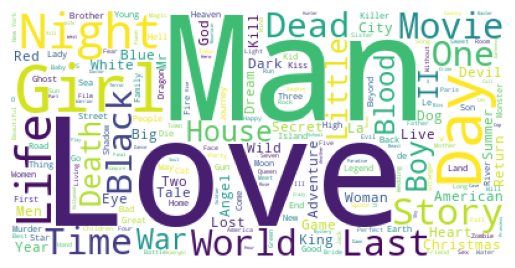

In [241]:
wordcloud2 = WordCloud(background_color ='white').generate(' '.join(df['title']))
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

This graph shows there are a lot of movies including the words love, man, girl, night, day and life, specially love. From this, I can assume there might be a lot of dramatic or romantic coming of age movies. I am keeping this column for my ML model and for the API. 

Column: vote_average

For this column, I will put the histogram here

<AxesSubplot: >

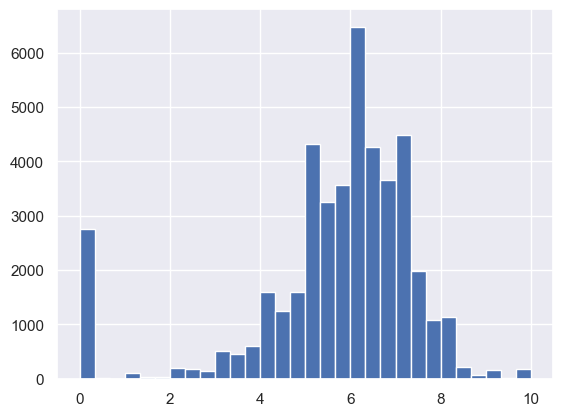

In [242]:
df['vote_average'].hist(bins=30)

In [243]:
df[df['vote_average']==0]

budget      id                                           overview  \
82        0.0  188588  Filmed entirely on location in East Hampton, L...   
106       0.0   96357  An ex-con holds a group of people hostage in a...   
125       0.0  290157  Michel Negroponte, a documentary filmmaker, me...   
131       0.0  124636  Within days after the release of Negativland's...   
136       0.0  124639   A subtle yet violent commentary on feudal lords.   
...       ...     ...                                                ...   
44340     0.0  323132  This film records a 12 day ritual performed by...   
44342     0.0  325439  Young Aladdin (Donald O'Connor) has a series o...   
44360     0.0  276895  Deep Hearts is a film about the Bororo Fulani,...   
44371     0.0  227506  In a small town live two brothers, one a minis...   
44372     0.0  461257  50 years after decriminalisation of homosexual...   

      release_date  revenue                         title  vote_average  \
82      1995-11-22      0.0   Last Summer in the Hamptons           0.0   
106     1995-05-20      0.0  Headless Body in Topless Bar           0.0   
125     1995-01-01      0.0                Jupiter's Wife           0.0   
131     1995-08-01      0.0                 Sonic Outlaws           0.0   
136     1995-08-01      0.0                        Target           0.0   
...            ...      ...                           ...           ...   
44340   1976-01-01      0.0                 Altar of Fire           0.0   
44342   1961-10-31      0.0        The Wonders of Aladdin           0.0   
44360   1981-01-01      0.0                   Deep Hearts           0.0   
44371   1917-10-21      0.0              Satan Triumphant           0.0   
44372   2017-06-09      0.0                      Queerama           0.0   

       release_year  return collection_name  idcollection  \
82             1995     0.0             NaN           NaN   
106            1995     0.0             NaN           NaN   
125            1995     0.0             NaN           NaN   
131            1995     0.0             NaN           NaN   
136            1995     0.0             NaN           NaN   
...             ...     ...             ...           ...   
44340          1976     0.0             NaN           NaN   
44342          1961     0.0             NaN           NaN   
44360          1981     0.0             NaN           NaN   
44371          1917     0.0             NaN           NaN   
44372          2017     0.0             NaN           NaN   

                    genres_name     idgenres               slang_name  \
82                           []           []                       []   
106                   ['Crime']         [80]                       []   
125                          []           []                       []   
131    ['Music', 'Documentary']  [10402, 99]              ['English']   
136                          []           []                       []   
...                         ...          ...                      ...   
44340           ['Documentary']         [99]              ['English']   
44342                        []           []              ['English']   
44360           ['Documentary']         [99]  ['Fulfulde', 'English']   
44371                        []           []                       []   
44372                        []           []              ['English']   

      slang_isocode  pcompany_name idpcompany                 pcountry_name  \
82               []             []         []                            []   
106              []             []         []                            []   
125              []             []         []                            []   
131          ['en']             []         []  ['United States of America']   
136              []             []         []                            []   
...             ...            ...        ...                           ...   
44340        ['en']           

As you can see, there are a lot of 0. In fact, 0 is the mode. I would say they are just a lot of very bad movies but this seems to be a case of missing information, since these rows also have a lot of null values in other columns. The mean value of this column is 5.6439613, which to be honest, I feel it is a value that represents correctly the database. The standard deviation could be worse, I think you can excpect a lot of variability in this kind of column since the vote is really a subjective value people give and you do have quite a lot of zeros, If you are willing to ignore those, this column would have some nice normal distribution. Also, there is not really outliers in this column. I am not keeping this column for my ML model.

In [244]:
df.drop(columns=['vote_average'],inplace=True)

Column: release_year

I am applying the same analysis to this column as I did for the release_date column. What is relevant from this is that 2014 was the year were most movies from this databse were released, as a matter of fact this databased is a little bit biased towards movies released in the 2000s. and 2010s. I am also only keeping this because I need it for the API. 

Column: return

As one would expect, high correlation among this column and revenue and bugdet columns. Same analysis for all of these 3. Only keeping it because I need it for the API. 

Column: collection_name

90% of this column has missing values. I already explained before why this is: not all movies belong to a franchise. I am keeping it as I need it for the API. 

Column: idcollection

Irrelevant. There is nothing to see here. I am going to drop it.

In [245]:
df.drop(columns='idcollection',inplace=True)

Column: genres_name

It seems like drama is the most viewed genre. There is some missing information here, however this is not showing up on the count because these values appear as empty lists. I do not really care about these missing values, since I want to base my model mainly on the overwiew column that has complete information. I am keeping this column. 

Here is a quick overview (and honestly kind of sloppy but it will do) of the genres in a word cloud.

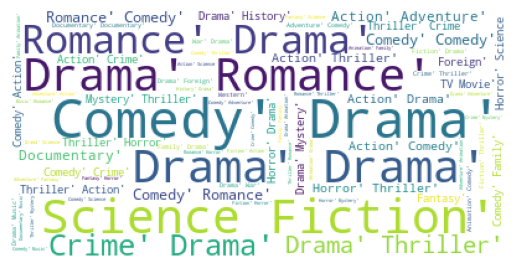

In [246]:
wordcloud3 = WordCloud(background_color ='white').generate(' '.join(df['genres_name']))
plt.imshow(wordcloud3)
plt.axis("off")
plt.show()

Column: idgenres

Also irrelevant, I already have genres_name. I am dropping it. 

In [247]:
df.drop(columns=['idgenres'],inplace=True)

Column: slang_name

This column has a lot of special characters (even japanese writing). And obviously, the pattern appears again, the majority of these movies are spoken in english and the second most spoken languaje is: null value, followed by French. Not surprised. I am dropping this, I honestly do not care for the language in a movie, if I do not speak it i just get subtitles.

In [248]:
df.drop(columns=['slang_name'], inplace=True)

Column: slang_isocode

This column has the same information as slang_name but since it is the iso code, it is more undestandable. As a matter of fact, watching this column was how I got to know the writing in special characters in the slang_name column was japanese. I am dropping it, as I said, I do not really care for it. 

In [249]:
df.drop(columns=['slang_isocode'], inplace=True)

Column: pcompany_name

25.3% of this column is blank. Most of the movies here are produced by the biggest studios like MGM, Warner, 20th Century Fox, etc. This column is not really relevant for the ML model, I am only keeping it because of the API.

Column: idpcompany

Same as the pcompany_name but this one is irrelevant, I am not keeping it. 

In [250]:
df.drop(columns='idpcompany', inplace=True)

Column: pcountry_name

As one would expect from the languages categories, the  country with most movies in this database is United States of America. Then, followed by missing information and then the United Kingdom. It makes a lot of sense. I am keeping this column for the API. 

Column: pcountry_isocode

Same analysis as the pcountry_name. This column is irrelevant, I am dropping it. 

In [251]:
df.drop(columns=['pcountry_isocode'], inplace=True)

This is the final DataFrame for the API and the recommendation model:

In [252]:
df.head()

budget     id                                           overview  \
0  30000000.0    862  Led by Woody, Andy's toys live happily in his ...   
1  65000000.0   8844  When siblings Judy and Peter discover an encha...   
2         0.0  15602  A family wedding reignites the ancient feud be...   
3  16000000.0  31357  Cheated on, mistreated and stepped on, the wom...   
4         0.0  11862  Just when George Banks has recovered from his ...   

  release_date      revenue                        title  release_year  \
0   1995-10-30  373554033.0                    Toy Story          1995   
1   1995-12-15  262797249.0                      Jumanji          1995   
2   1995-12-22          0.0             Grumpier Old Men          1995   
3   1995-12-22   81452156.0            Waiting to Exhale          1995   
4   1995-02-10   76578911.0  Father of the Bride Part II          1995   

      return                 collection_name  \
0  12.451801            Toy Story Collection   
1   4.043035                             NaN   
2   0.000000       Grumpy Old Men Collection   
3   5.090760                             NaN   
4   0.000000  Father of the Bride Collection   

                          genres_name  \
0   ['Animation', 'Comedy', 'Family']   
1  ['Adventure', 'Fantasy', 'Family']   
2               ['Romance', 'Comedy']   
3      ['Comedy', 'Drama', 'Romance']   
4                          ['Comedy']   

                                       pcompany_name  \
0                        ['Pixar Animation Studios']   
1  ['TriStar Pictures', 'Teitler Film', 'Intersco...   
2                 ['Warner Bros.', 'Lancaster Gate']   
3         ['Twentieth Century Fox Film Corporation']   
4   ['Sandollar Productions', 'Touchstone Pictures']   

                  pcountry_name  
0  ['United States of America']  
1  ['United States of America']  
2  ['United States of America']  
3  ['United States of America']  
4  ['United States of America']

I am going to save it as a csv file so that I can work with it for my model. 

In [253]:
df.to_csv('Movies_ETL_EDA.csv')